In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

# DEEP2

In [ ]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'

## experiments

In [2]:
path                                  =  './models/test_shuffle/object/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 1e-05
time_dim     : 25
encoder      : [750, 364]
decoder      : [328]
vector       : 750
AUC_v        : 0.7256242197253433


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## Min plus linear

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/min_pos_linear')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=736455, Mon May  7 12:10:54 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -7.202105795033219e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:42.0
    2     40 -7.219585805685100e-01 1.0e+00 4.04e-01  4e-01  4e-01 0:49.0
    3     60 -7.228155107782019e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:55.3
    4     80 -7.227813701323975e-01 1.0e+00 3.91e-01  4e-01  4e-01 1:01.7
    5    100 -7.243006288706958e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:08.5
    6    120 -7.249629573993023e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:13.9
    7    140 -7.259427939338901e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:20.5
    8    160 -7.270318805350522e-01 1.0e+00 3.74e-01  4e-01  4e-01 1:26.8
    9    180 -7.281516937174385e-01 1.0e+00 3.70e-01  4e-01  4e-01 1:34.0
   10    200 -7.284623735942588e-01 1.0e+00 3.68e-01  4e-01  4e-01 1:39.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.291417

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -7.697315862426853e-01 1.3e+00 4.53e-01  5e-01  5e-01 18:00.3
  102   2040 -7.713430247246558e-01 1.3e+00 4.54e-01  5e-01  5e-01 18:08.2
  103   2060 -7.712952278205294e-01 1.3e+00 4.56e-01  5e-01  5e-01 18:14.6
  104   2080 -7.716434624077348e-01 1.3e+00 4.58e-01  5e-01  5e-01 18:21.3
  105   2100 -7.764914341119676e-01 1.3e+00 4.60e-01  5e-01  5e-01 18:27.4
  106   2120 -7.758188633896199e-01 1.3e+00 4.62e-01  5e-01  5e-01 19:18.9
  107   2140 -7.789563887390495e-01 1.3e+00 4.65e-01  5e-01  5e-01 19:28.0
  108   2160 -7.815271793681249e-01 1.3e+00 4.67e-01  5e-01  5e-01 19:34.2
  109   2180 -7.893112466115408e-01 1.3e+00 4.69e-01  5e-01  5e-01 19:42.4
  110   2200 -7.941865308324173e-01 1.3e+00 4.72e-01  5e-01  5e-01 19:49.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -7.996319638382279e-01 1.3e+00 4.74e-01  5e-01  5e-01 19:56.2
  112   2240 -8.018989027196439

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

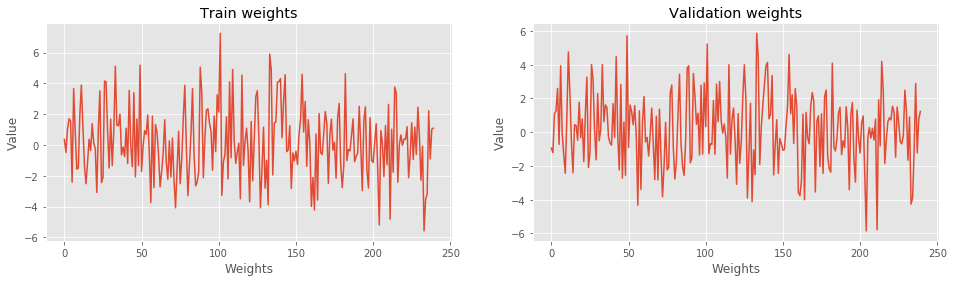

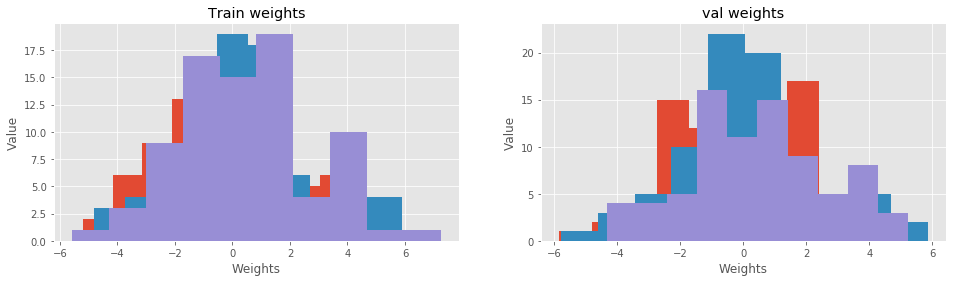

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

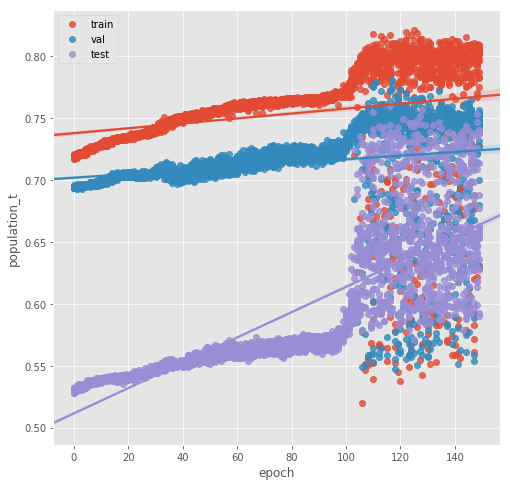

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

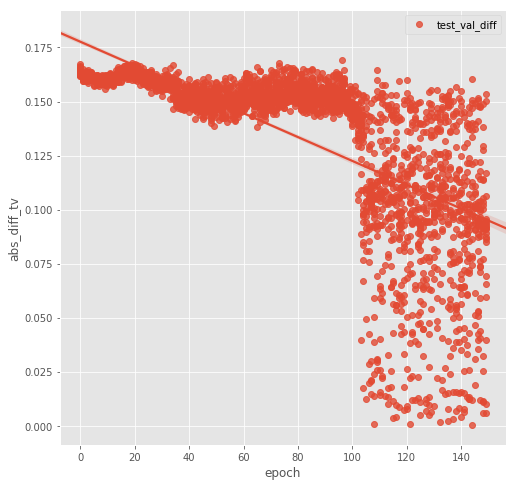

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()


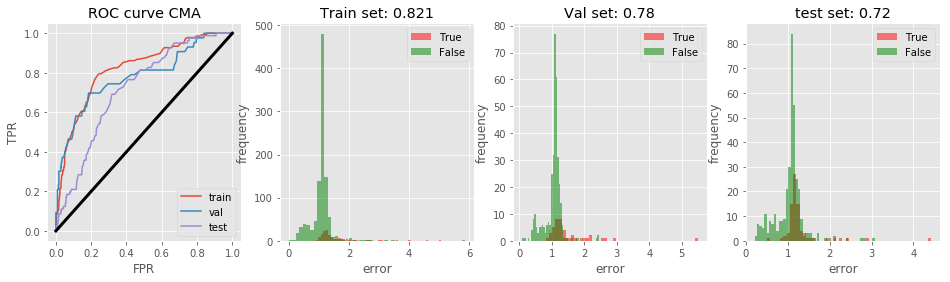

In [9]:
BO_vis.plot_cma(data)

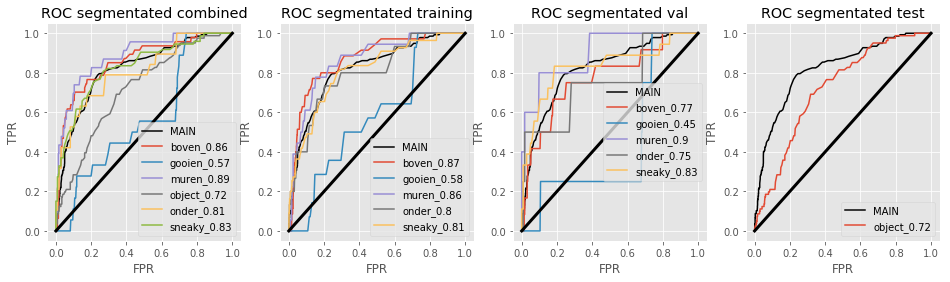

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

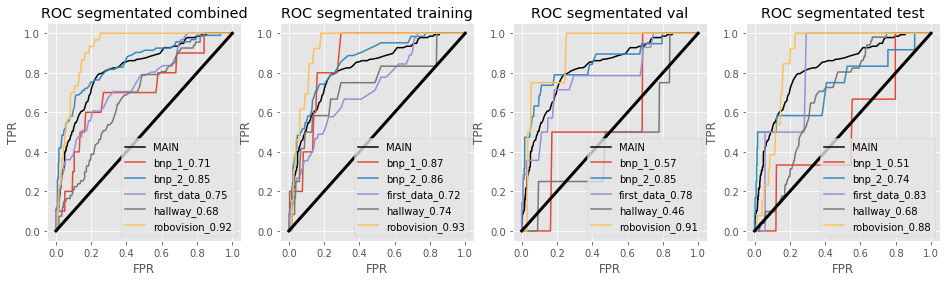

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus linear

In [12]:
dict_c = return_dict()
dict_c['mode']   = 'linear'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_linear')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=778885, Mon May  7 12:38:02 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -7.208012126757389e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:35.4
    2     40 -7.215045099793108e-01 1.0e+00 4.05e-01  4e-01  4e-01 0:44.1
    3     60 -7.217981195332291e-01 1.0e+00 3.97e-01  4e-01  4e-01 0:50.2
    4     80 -7.224194792868702e-01 1.0e+00 3.91e-01  4e-01  4e-01 0:56.0
    5    100 -7.236690269233134e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:02.4
    6    120 -7.244167070664308e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:09.3
    7    140 -7.252872935344444e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:15.5
    8    160 -7.257106375424197e-01 1.0e+00 3.73e-01  4e-01  4e-01 1:21.2
    9    180 -7.256764968966152e-01 1.0e+00 3.70e-01  4e-01  4e-01 1:26.9
   10    200 -7.261783643899408e-01 1.0e+00 3.67e-01  4e-01  4e-01 1:31.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.268441

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -7.368678005913160e-01 1.2e+00 3.62e-01  4e-01  4e-01 15:37.3
  102   2040 -7.370999569827863e-01 1.2e+00 3.61e-01  4e-01  4e-01 15:43.0
  103   2060 -7.376257229281749e-01 1.2e+00 3.61e-01  4e-01  4e-01 15:49.8
  104   2080 -7.379364028049955e-01 1.2e+00 3.60e-01  4e-01  4e-01 15:55.8
  105   2100 -7.372809024055499e-01 1.2e+00 3.59e-01  4e-01  4e-01 16:00.2
  106   2120 -7.375574416365660e-01 1.2e+00 3.59e-01  4e-01  4e-01 16:37.9
  107   2140 -7.368848709142182e-01 1.2e+00 3.59e-01  4e-01  4e-01 16:44.9
  108   2160 -7.370999569827863e-01 1.2e+00 3.59e-01  4e-01  4e-01 16:50.7
  109   2180 -7.372809024055500e-01 1.2e+00 3.58e-01  4e-01  4e-01 16:56.9
  110   2200 -7.375028166032789e-01 1.2e+00 3.58e-01  4e-01  4e-01 17:02.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -7.373218711805152e-01 1.2e+00 3.57e-01  4e-01  4e-01 17:09.1
  112   2240 -7.373321133742565

In [13]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

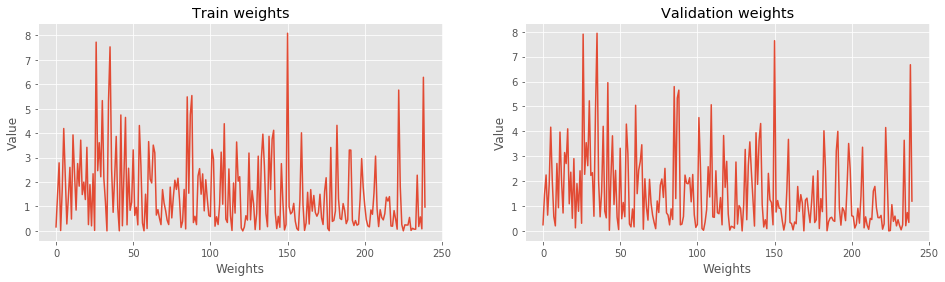

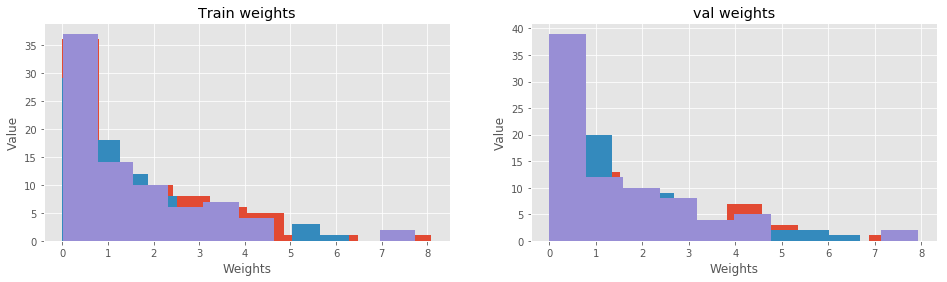

In [14]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

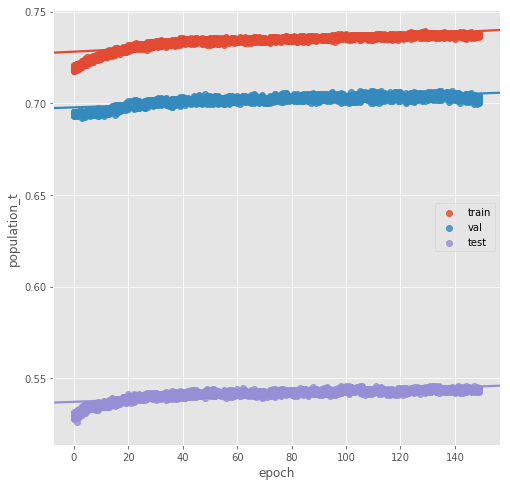

In [15]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

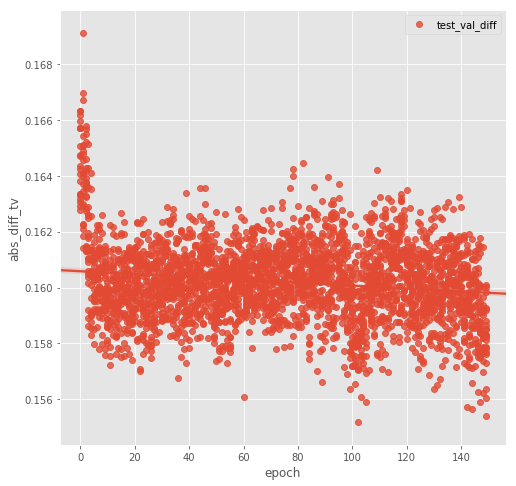

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

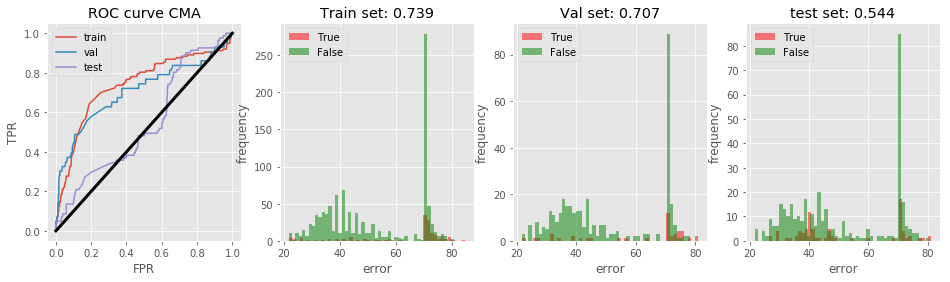

In [17]:
BO_vis.plot_cma(data)

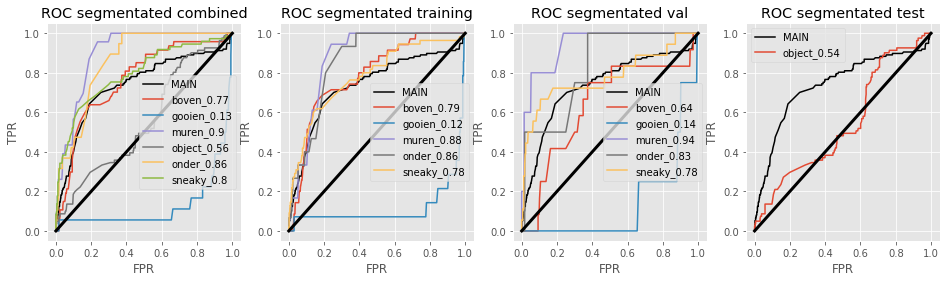

In [18]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

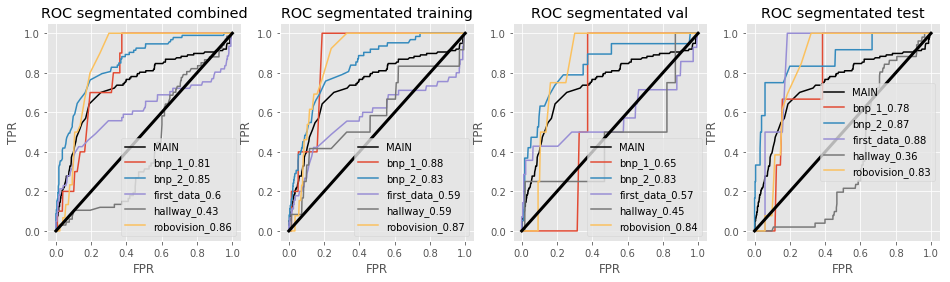

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min sigmoid

In [20]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=846692, Mon May  7 13:02:32 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -5.521942193058523e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:39.7
    2     40 -5.420578615665095e-01 1.0e+00 4.05e-01  4e-01  4e-01 0:48.6
    3     60 -5.178248311745065e-01 1.0e+00 3.97e-01  4e-01  4e-01 0:55.5
    4     80 -5.483568107174315e-01 1.0e+00 3.91e-01  4e-01  4e-01 1:01.7
    5    100 -5.713027387626065e-01 1.0e+00 3.85e-01  4e-01  4e-01 1:07.9
    6    120 -5.817941592183160e-01 1.0e+00 3.80e-01  4e-01  4e-01 1:15.5
    7    140 -5.617774985831632e-01 1.0e+00 3.76e-01  4e-01  4e-01 1:22.3
    8    160 -5.762667886625743e-01 1.0e+00 3.71e-01  4e-01  4e-01 1:28.9
    9    180 -5.442531050917360e-01 1.0e+00 3.67e-01  4e-01  4e-01 1:36.1
   10    200 -5.785303134794099e-01 1.0e+00 3.63e-01  4e-01  4e-01 1:43.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -5.737096

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -6.703208537892704e-01 1.2e+00 3.38e-01  3e-01  3e-01 12:38.9
  102   2040 -6.715601592319720e-01 1.2e+00 3.38e-01  3e-01  3e-01 12:43.0
  103   2060 -6.660703433866154e-01 1.2e+00 3.38e-01  3e-01  3e-01 12:47.9
  104   2080 -6.741514342485302e-01 1.2e+00 3.38e-01  3e-01  3e-01 12:53.7
  105   2100 -6.744006609629027e-01 1.2e+00 3.38e-01  3e-01  3e-01 12:59.0
  106   2120 -6.630625524912428e-01 1.2e+00 3.38e-01  3e-01  3e-01 13:26.8
  107   2140 -6.736529808197853e-01 1.2e+00 3.38e-01  3e-01  3e-01 13:32.5
  108   2160 -6.689347435696092e-01 1.2e+00 3.38e-01  3e-01  3e-01 13:36.6
  109   2180 -6.689825404737355e-01 1.2e+00 3.39e-01  3e-01  3e-01 13:41.7
  110   2200 -6.636565997282404e-01 1.2e+00 3.39e-01  3e-01  3e-01 13:48.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -6.753941537558125e-01 1.2e+00 3.39e-01  3e-01  3e-01 13:52.7
  112   2240 -6.642233344485944

In [21]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

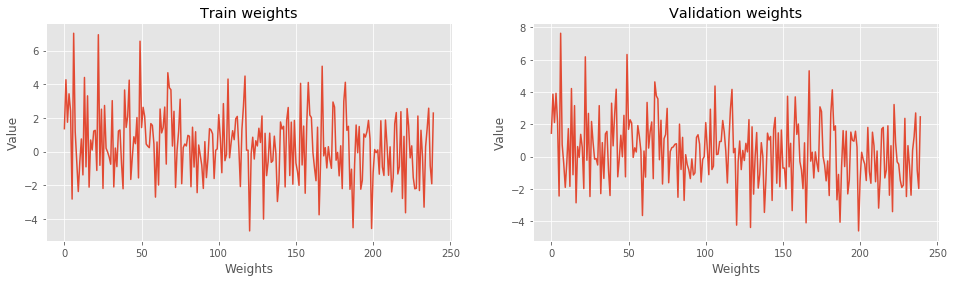

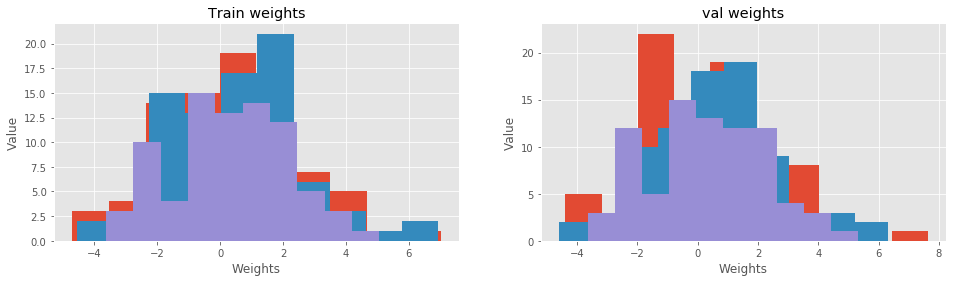

In [22]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

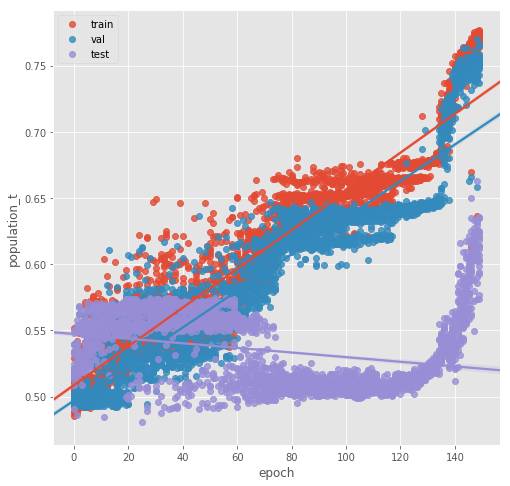

In [23]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

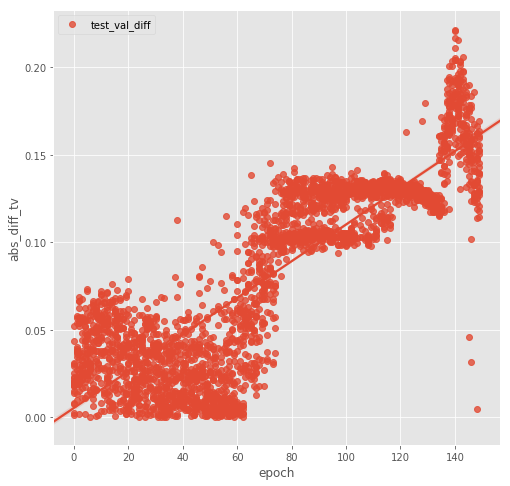

In [24]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

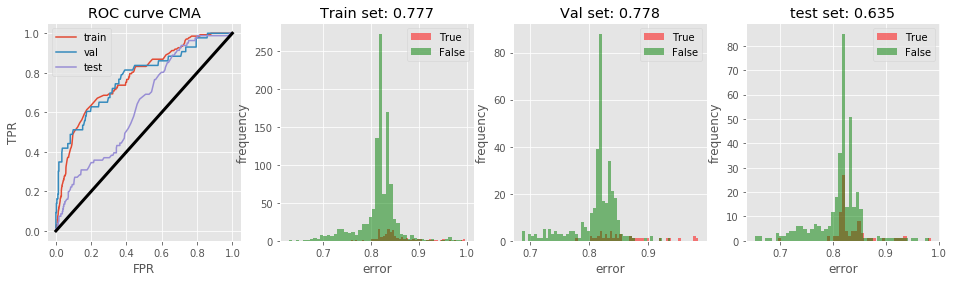

In [25]:
BO_vis.plot_cma(data)

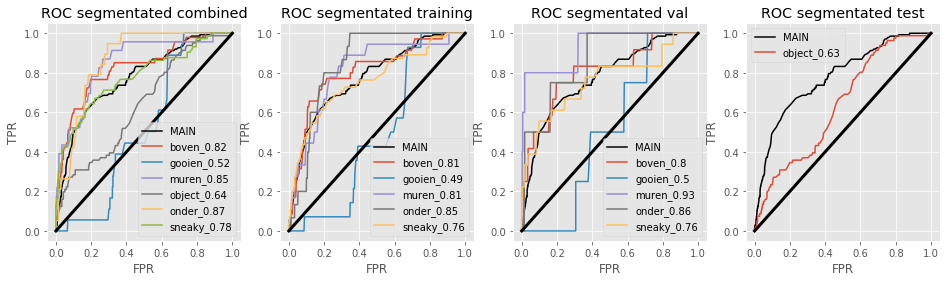

In [26]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

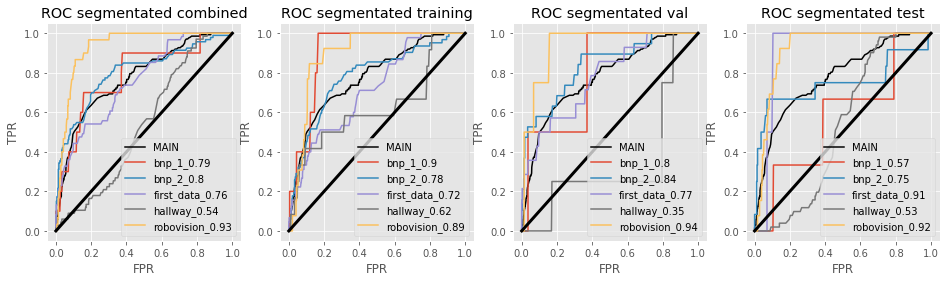

In [27]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min relu

In [28]:
dict_c = return_dict()
dict_c['mode']   = 'relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=760111, Mon May  7 13:22:01 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -7.203983530552465e-01 1.0e+00 4.12e-01  4e-01  4e-01 0:26.9
    2     40 -7.216513147562699e-01 1.0e+00 4.04e-01  4e-01  4e-01 0:31.8
    3     60 -7.227540576157538e-01 1.0e+00 3.97e-01  4e-01  4e-01 0:35.5
    4     80 -7.238738707981400e-01 1.0e+00 3.91e-01  4e-01  4e-01 0:39.4
    5    100 -7.239148395731054e-01 1.0e+00 3.86e-01  4e-01  4e-01 0:43.2
    6    120 -7.243142851290176e-01 1.0e+00 3.81e-01  4e-01  4e-01 0:47.0
    7    140 -7.250414808846525e-01 1.0e+00 3.77e-01  4e-01  4e-01 0:50.8
    8    160 -7.260622861942057e-01 1.0e+00 3.73e-01  4e-01  4e-01 0:55.6
    9    180 -7.269260445330585e-01 1.0e+00 3.70e-01  4e-01  4e-01 1:00.5
   10    200 -7.284453032713567e-01 1.0e+00 3.68e-01  4e-01  4e-01 1:04.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.285818

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -8.118133462612579e-01 1.3e+00 5.11e-01  5e-01  5e-01 10:44.9
  102   2040 -8.046199121902591e-01 1.3e+00 5.12e-01  5e-01  5e-01 10:48.6
  103   2060 -8.068151557154855e-01 1.3e+00 5.13e-01  5e-01  5e-01 10:52.8
  104   2080 -8.120967136214349e-01 1.3e+00 5.14e-01  5e-01  5e-01 10:58.3
  105   2100 -8.048349982588271e-01 1.3e+00 5.15e-01  5e-01  5e-01 11:02.7
  106   2120 -8.081773674830833e-01 1.3e+00 5.15e-01  5e-01  5e-01 11:29.7
  107   2140 -8.044492089612367e-01 1.3e+00 5.16e-01  5e-01  5e-01 11:34.8
  108   2160 -8.088977351095573e-01 1.3e+00 5.16e-01  5e-01  5e-01 11:38.6
  109   2180 -8.114002444470241e-01 1.3e+00 5.17e-01  5e-01  5e-01 11:42.7
  110   2200 -8.078393750896192e-01 1.3e+00 5.17e-01  5e-01  5e-01 11:46.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -8.081841956122442e-01 1.3e+00 5.17e-01  5e-01  5e-01 11:50.7
  112   2240 -8.031586925498282

In [29]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

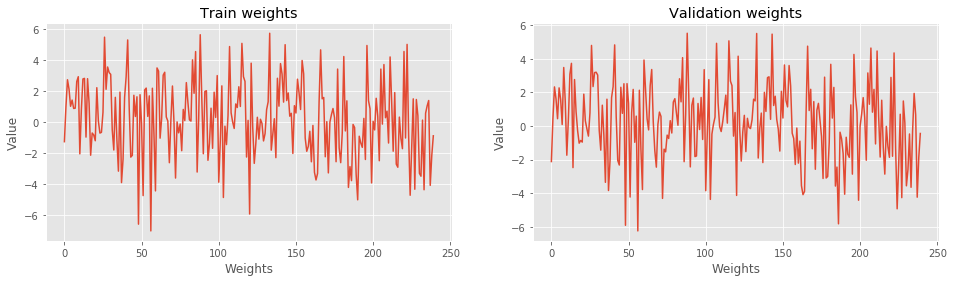

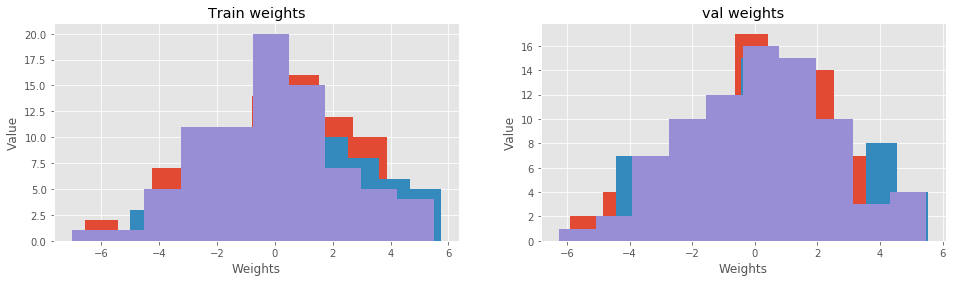

In [30]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

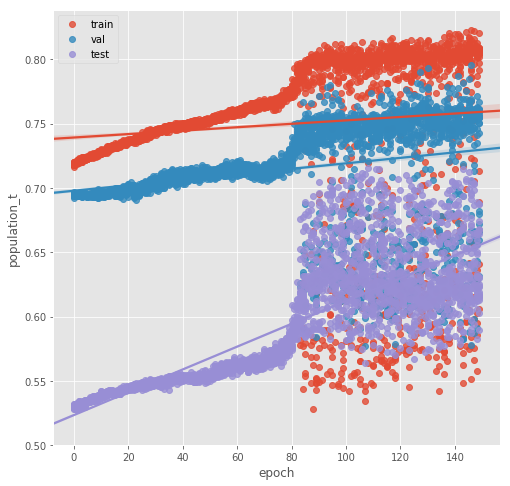

In [31]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

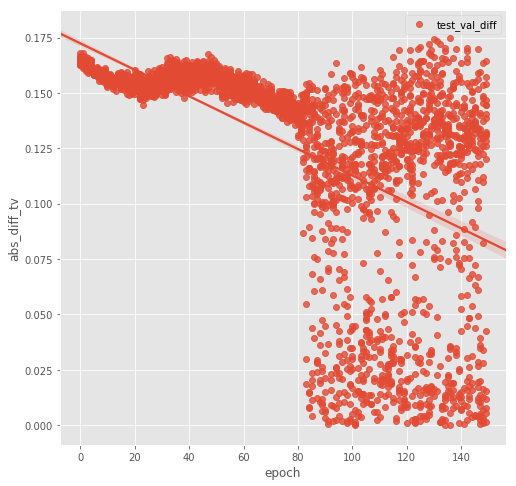

In [32]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

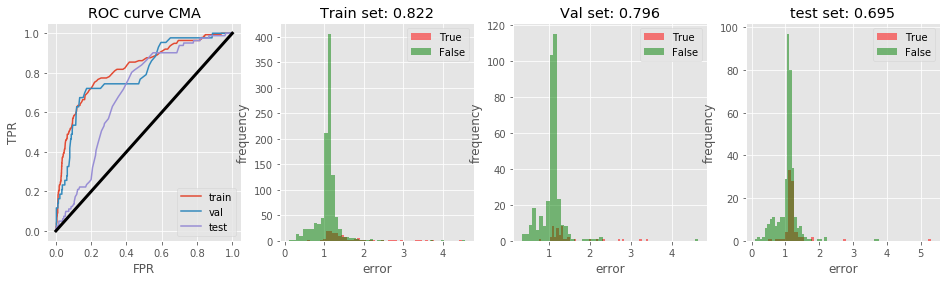

In [33]:
BO_vis.plot_cma(data)

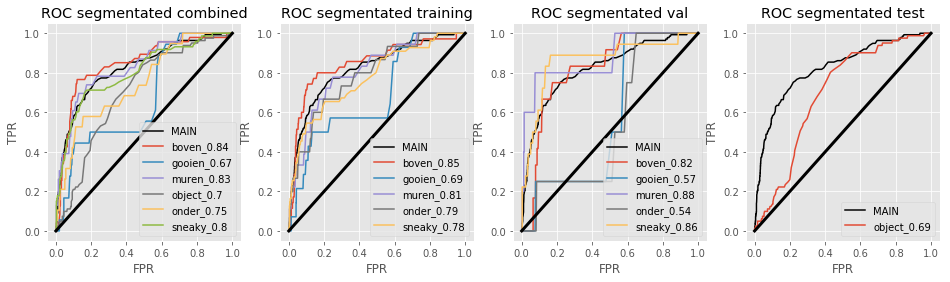

In [34]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

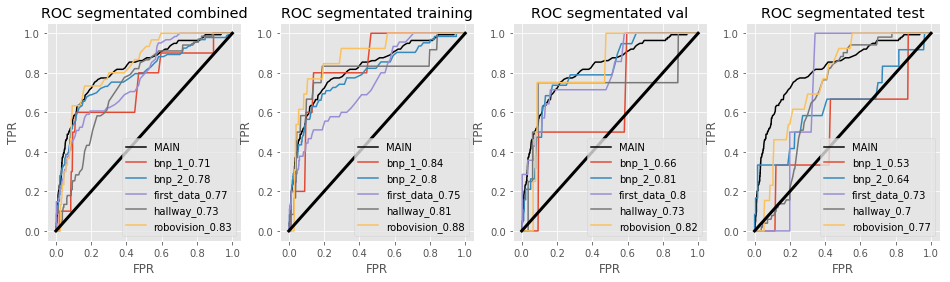

In [35]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [36]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=797406, Mon May  7 13:38:55 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -7.215284084313739e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:26.9
    2     40 -7.222521901224285e-01 1.0e+00 4.04e-01  4e-01  4e-01 0:31.9
    3     60 -7.223580261244222e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:36.2
    4     80 -7.236656128587329e-01 1.0e+00 3.92e-01  4e-01  4e-01 0:40.1
    5    100 -7.246386212641598e-01 1.0e+00 3.86e-01  4e-01  4e-01 0:44.2
    6    120 -7.250448949492329e-01 1.0e+00 3.82e-01  4e-01  4e-01 0:49.4
    7    140 -7.263593098127044e-01 1.0e+00 3.78e-01  4e-01  4e-01 0:53.9
    8    160 -7.269465289205412e-01 1.0e+00 3.75e-01  4e-01  4e-01 0:57.8
    9    180 -7.274654667367688e-01 1.0e+00 3.72e-01  4e-01  4e-01 1:01.6
   10    200 -7.275235058346365e-01 1.0e+00 3.70e-01  4e-01  4e-01 1:05.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.289369

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -8.127624562146217e-01 1.3e+00 5.55e-01  6e-01  6e-01 10:59.1
  102   2040 -8.098912279024671e-01 1.3e+00 5.57e-01  6e-01  6e-01 11:02.9
  103   2060 -8.122674168504571e-01 1.3e+00 5.58e-01  6e-01  6e-01 11:06.8
  104   2080 -8.148484496732741e-01 1.3e+00 5.59e-01  6e-01  6e-01 11:10.6
  105   2100 -8.203826483581763e-01 1.3e+00 5.60e-01  6e-01  6e-01 11:14.2
  106   2120 -8.177060217271070e-01 1.3e+00 5.61e-01  6e-01  6e-01 11:40.3
  107   2140 -8.155585751060067e-01 1.3e+00 5.62e-01  6e-01  6e-01 11:45.4
  108   2160 -8.090684383385794e-01 1.3e+00 5.64e-01  6e-01  6e-01 11:49.2
  109   2180 -8.113797600595413e-01 1.3e+00 5.65e-01  6e-01  6e-01 11:53.0
  110   2200 -8.049681467774645e-01 1.3e+00 5.66e-01  6e-01  6e-01 11:56.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -8.048145138713445e-01 1.3e+00 5.67e-01  6e-01  6e-01 12:01.4
  112   2240 -8.092937666008891

In [37]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

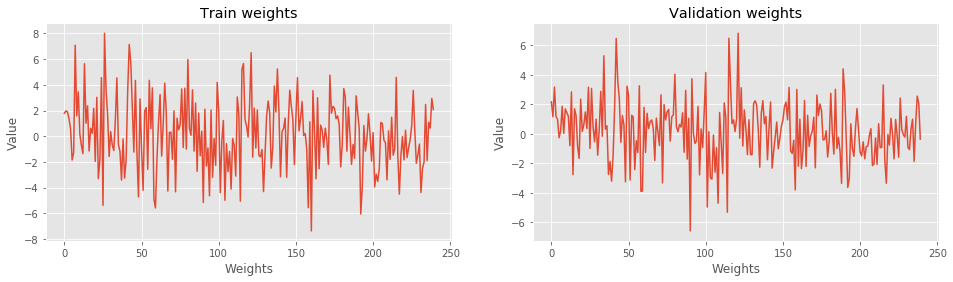

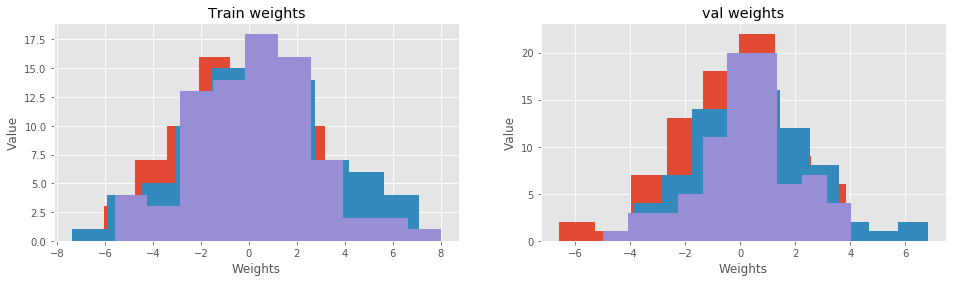

In [38]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

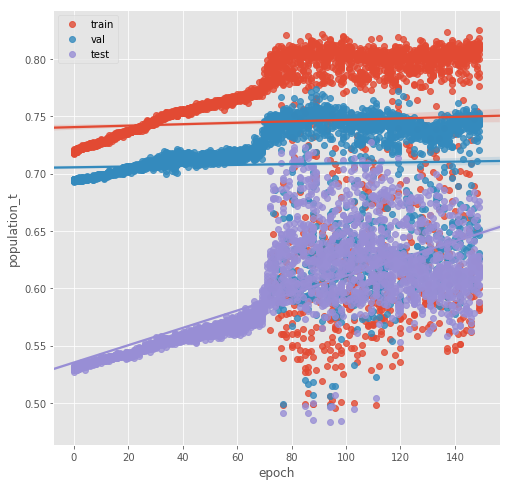

In [39]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

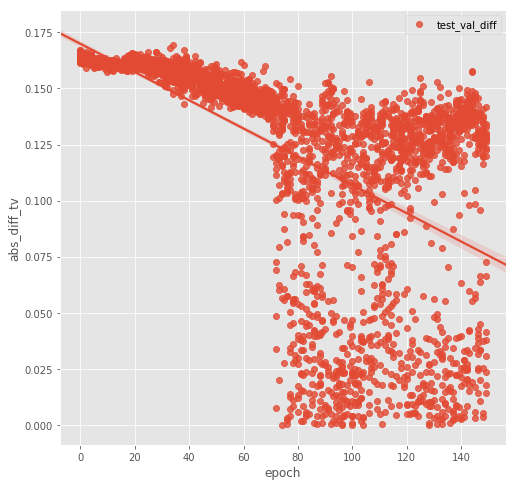

In [40]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

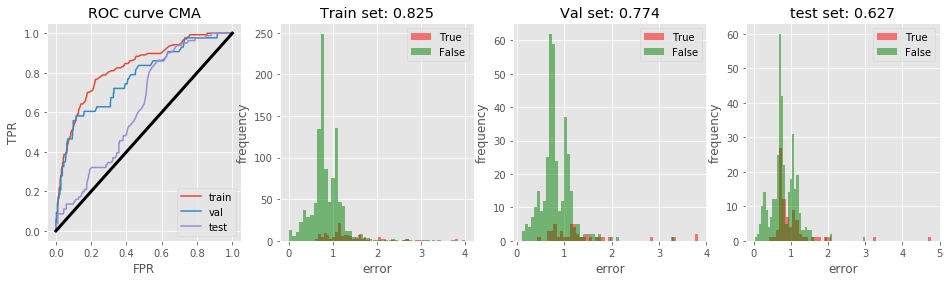

In [41]:
BO_vis.plot_cma(data)

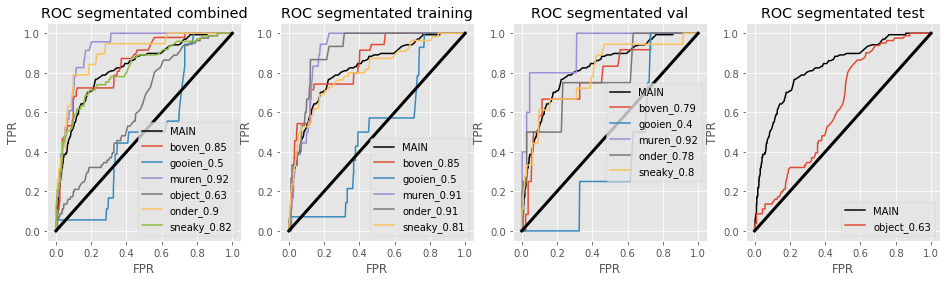

In [42]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

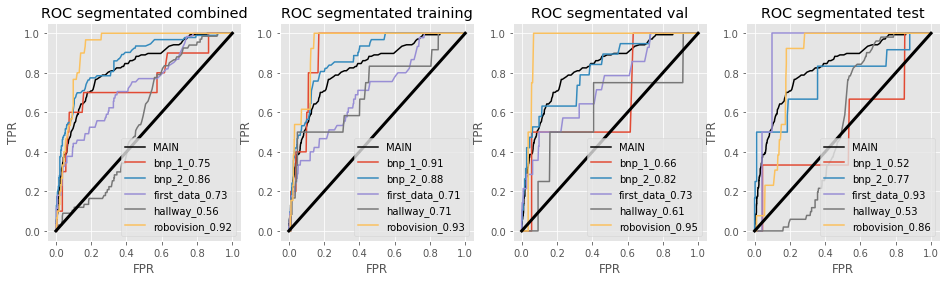

In [43]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu C

In [44]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu_C'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu_C')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 242 (seed=804072, Mon May  7 13:56:08 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -5.764579762790792e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:30.4
    2     40 -6.355212935207882e-01 1.0e+00 4.05e-01  4e-01  4e-01 0:36.9
    3     60 -6.740285279236342e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:41.7
    4     80 -7.183430861778182e-01 1.0e+00 3.91e-01  4e-01  4e-01 0:46.5
    5    100 -7.221019712808888e-01 1.0e+00 3.86e-01  4e-01  4e-01 0:51.7
    6    120 -7.195004540705892e-01 1.0e+00 3.81e-01  4e-01  4e-01 0:56.3
    7    140 -7.187186332816671e-01 1.0e+00 3.76e-01  4e-01  4e-01 1:02.6
    8    160 -7.199647668535298e-01 1.0e+00 3.72e-01  4e-01  4e-01 1:08.6
    9    180 -7.196813994933529e-01 1.0e+00 3.67e-01  4e-01  4e-01 1:13.6
   10    200 -7.204188374427291e-01 1.0e+00 3.64e-01  4e-01  4e-01 1:18.6
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.220951

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -7.286842877919879e-01 1.2e+00 3.20e-01  3e-01  3e-01 13:24.8
  102   2040 -7.280663421029272e-01 1.2e+00 3.19e-01  3e-01  3e-01 13:32.2
  103   2060 -7.297938587806327e-01 1.2e+00 3.19e-01  3e-01  3e-01 13:37.2
  104   2080 -7.290086239271303e-01 1.2e+00 3.19e-01  3e-01  3e-01 13:42.4
  105   2100 -7.275132636408951e-01 1.2e+00 3.18e-01  3e-01  3e-01 13:48.8
  106   2120 -7.299372494930114e-01 1.2e+00 3.18e-01  3e-01  3e-01 14:19.8
  107   2140 -7.310638908045584e-01 1.2e+00 3.17e-01  3e-01  3e-01 14:26.2
  108   2160 -7.290086239271303e-01 1.2e+00 3.17e-01  3e-01  3e-01 14:31.3
  109   2180 -7.296333977453517e-01 1.2e+00 3.17e-01  3e-01  3e-01 14:36.3
  110   2200 -7.271820993765918e-01 1.2e+00 3.16e-01  3e-01  3e-01 14:41.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -7.291178739937044e-01 1.2e+00 3.16e-01  3e-01  3e-01 14:48.2
  112   2240 -7.294934210975534

In [45]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

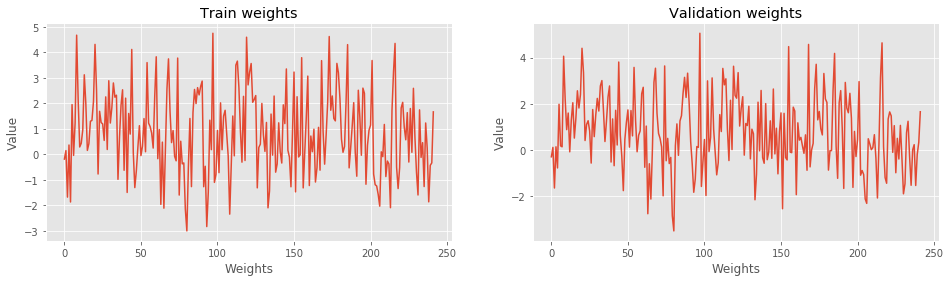

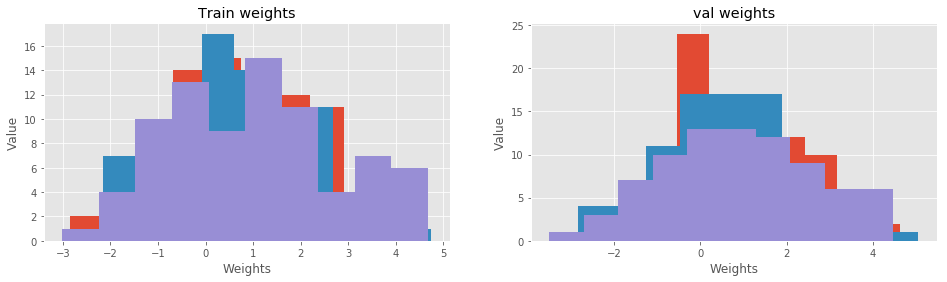

In [46]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

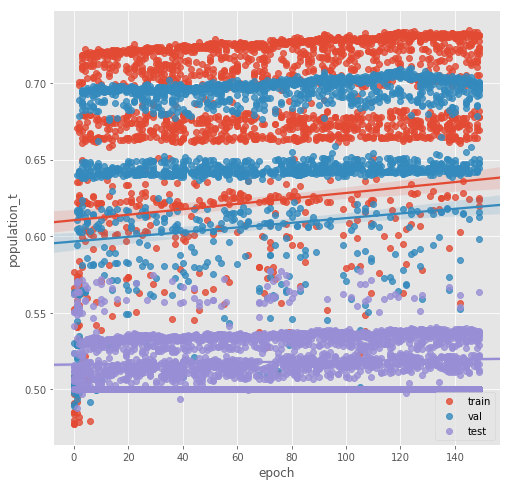

In [47]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

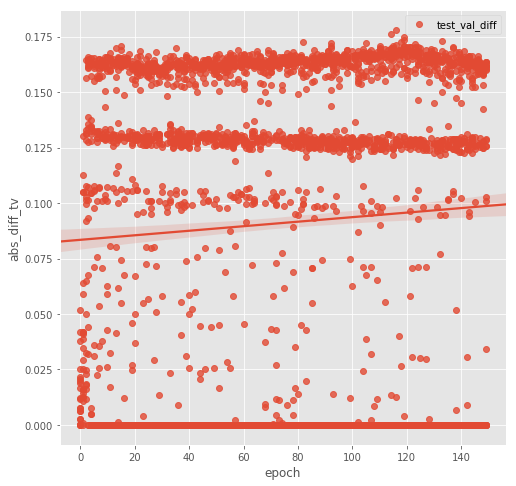

In [48]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

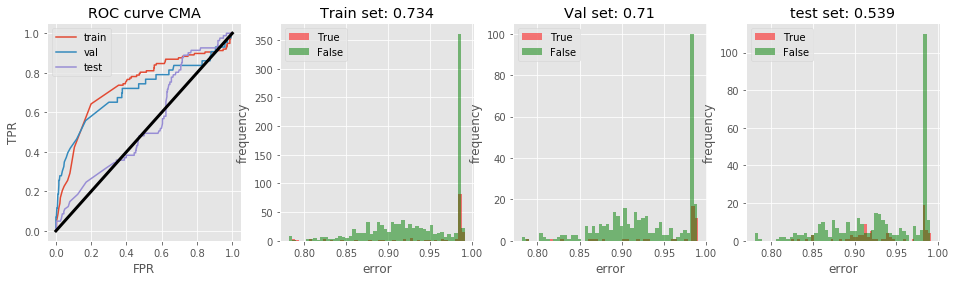

In [49]:
BO_vis.plot_cma(data)

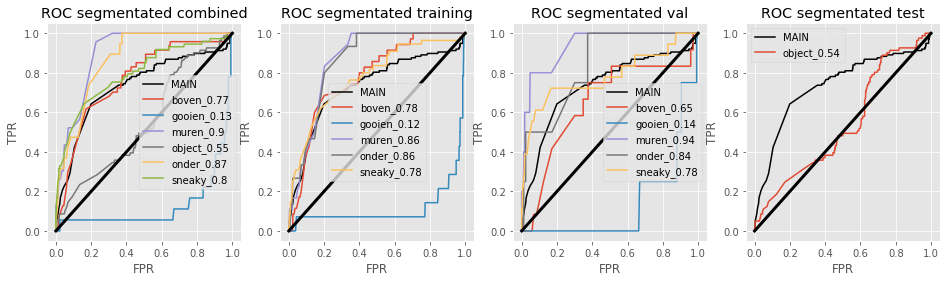

In [50]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

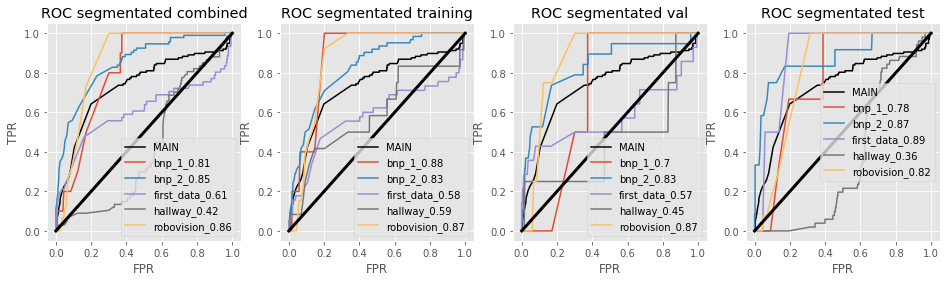

In [51]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [52]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0.,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=748599, Mon May  7 14:17:15 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -6.050132124299262e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:26.6
    2     40 -5.338777628317617e-01 1.0e+00 4.04e-01  4e-01  4e-01 0:32.3
    3     60 -5.491727721521580e-01 1.0e+00 3.97e-01  4e-01  4e-01 0:36.5
    4     80 -5.297672290769052e-01 1.0e+00 3.91e-01  4e-01  4e-01 0:41.0
    5    100 -5.731326773777252e-01 1.0e+00 3.86e-01  4e-01  4e-01 0:45.5
    6    120 -5.407878295425836e-01 1.0e+00 3.81e-01  4e-01  4e-01 0:51.5
    7    140 -5.485753108505801e-01 1.0e+00 3.76e-01  4e-01  4e-01 0:56.5
    8    160 -5.723440284596424e-01 1.0e+00 3.72e-01  4e-01  4e-01 1:01.0
    9    180 -5.463390985503882e-01 1.0e+00 3.68e-01  4e-01  4e-01 1:05.1
   10    200 -6.031218206523594e-01 1.0e+00 3.65e-01  4e-01  4e-01 1:09.6
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -6.015103

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -5.411667907110131e-01 1.2e+00 2.76e-01  3e-01  3e-01 11:58.2
  102   2040 -5.454650980177941e-01 1.2e+00 2.75e-01  3e-01  3e-01 12:02.1
  103   2060 -5.544372597352051e-01 1.2e+00 2.75e-01  3e-01  3e-01 12:06.7
  104   2080 -5.687695028439159e-01 1.2e+00 2.75e-01  3e-01  3e-01 12:10.9
  105   2100 -5.497702334537360e-01 1.2e+00 2.75e-01  3e-01  3e-01 12:15.2
  106   2120 -5.683905416754864e-01 1.2e+00 2.75e-01  3e-01  3e-01 12:42.7
  107   2140 -5.538875953377534e-01 1.2e+00 2.74e-01  3e-01  3e-01 12:48.4
  108   2160 -5.716646296081338e-01 1.2e+00 2.74e-01  3e-01  3e-01 12:54.0
  109   2180 -5.390534847357173e-01 1.2e+00 2.74e-01  3e-01  3e-01 12:58.4
  110   2200 -5.713539497313131e-01 1.2e+00 2.73e-01  3e-01  3e-01 13:02.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -5.709101213358552e-01 1.2e+00 2.73e-01  3e-01  3e-01 13:07.1
  112   2240 -5.837094494479459

In [53]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

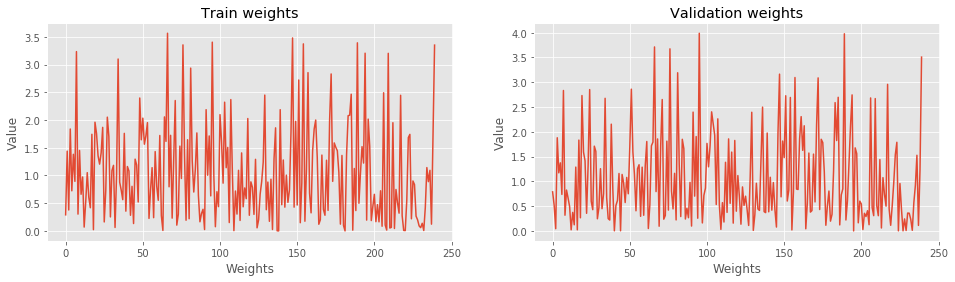

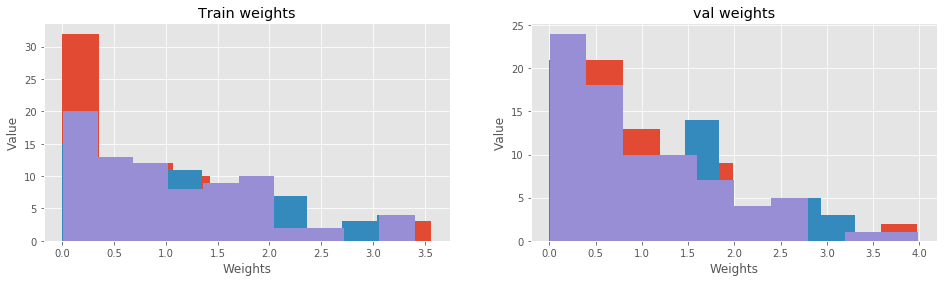

In [54]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

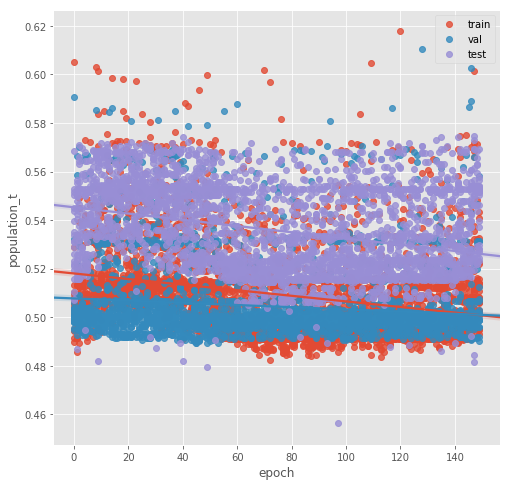

In [55]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

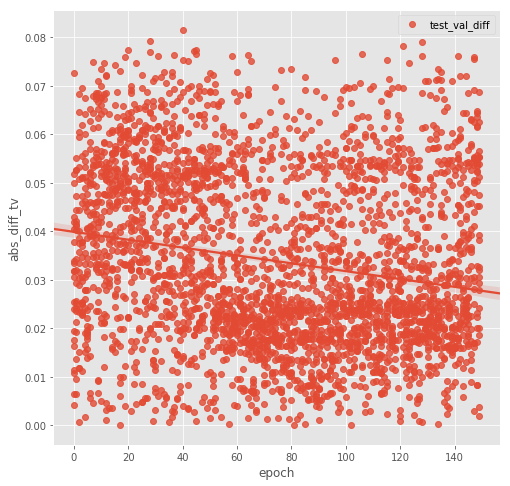

In [56]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

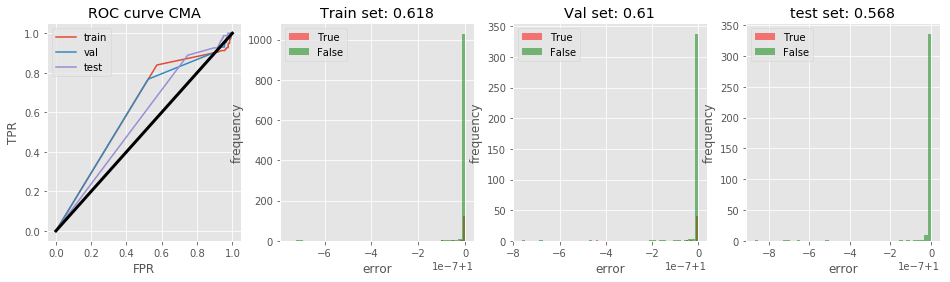

In [57]:
BO_vis.plot_cma(data)

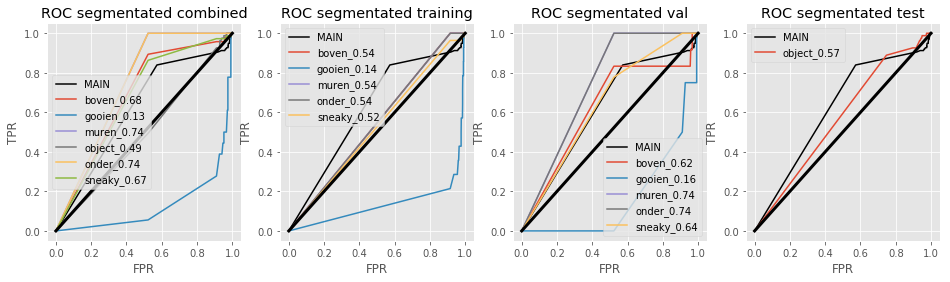

In [58]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

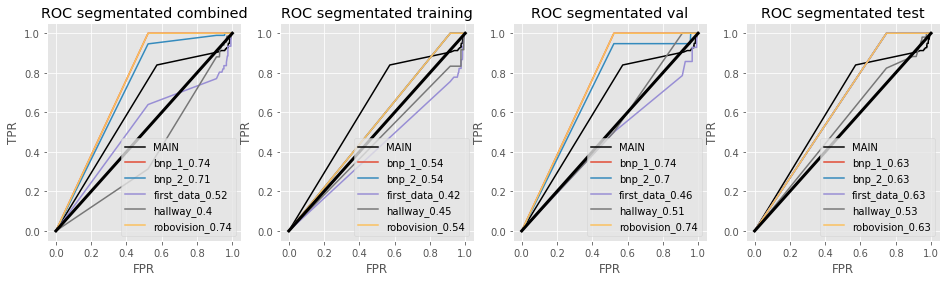

In [59]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid FL

In [60]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid_FL'
dict_c['bounds'] = [0.,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid_FL')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 240 (seed=787978, Mon May  7 14:36:05 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -7.218220179852922e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:47.4
    2     40 -7.215864475292416e-01 1.0e+00 4.05e-01  4e-01  4e-01 0:58.6
    3     60 -7.226926044533060e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:08.7
    4     80 -7.230203546530287e-01 1.0e+00 3.92e-01  4e-01  4e-01 1:18.6
    5    100 -7.230715656217354e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:28.4
    6    120 -7.234744252422278e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:38.2
    7    140 -7.246113087475163e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:48.2
    8    160 -7.253111919865076e-01 1.0e+00 3.73e-01  4e-01  4e-01 1:58.1
    9    180 -7.255740749592019e-01 1.0e+00 3.70e-01  4e-01  4e-01 2:08.2
   10    200 -7.255843171529432e-01 1.0e+00 3.67e-01  4e-01  4e-01 2:18.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.262193

  100   2000 -7.346862133244112e-01 1.2e+00 3.53e-01  4e-01  4e-01 23:13.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -7.355055888237182e-01 1.2e+00 3.53e-01  4e-01  4e-01 23:23.3
  102   2040 -7.350037213303927e-01 1.2e+00 3.53e-01  4e-01  4e-01 23:32.7
  103   2060 -7.356284951486142e-01 1.2e+00 3.53e-01  4e-01  4e-01 23:43.7
  104   2080 -7.354509637904312e-01 1.2e+00 3.54e-01  4e-01  4e-01 23:53.9
  105   2100 -7.348910571992380e-01 1.2e+00 3.54e-01  4e-01  4e-01 24:03.5
  106   2120 -7.354816903716551e-01 1.2e+00 3.54e-01  4e-01  4e-01 24:51.4
  107   2140 -7.350276197824559e-01 1.2e+00 3.54e-01  4e-01  4e-01 25:03.5
  108   2160 -7.354202372092071e-01 1.2e+00 3.55e-01  4e-01  4e-01 25:13.7
  109   2180 -7.349559244262664e-01 1.2e+00 3.55e-01  4e-01  4e-01 25:24.0
  110   2200 -7.356831201819013e-01 1.2e+00 3.55e-01  4e-01  4e-01 25:33.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -7.353553699821787

In [61]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

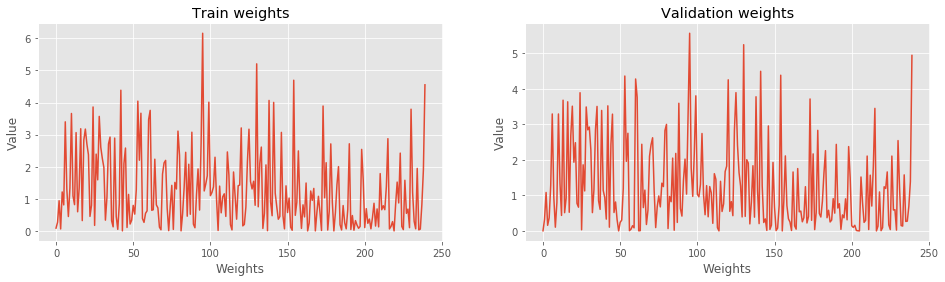

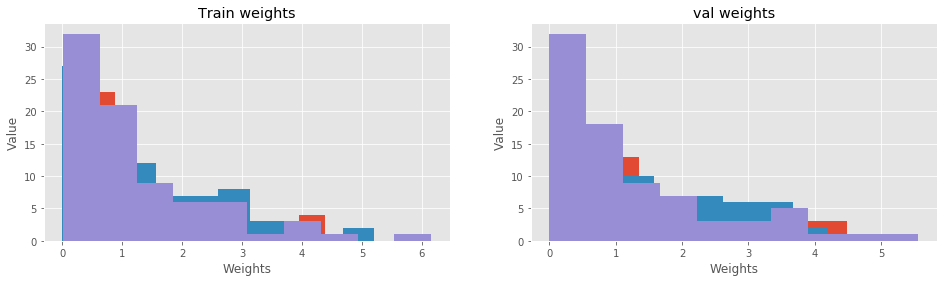

In [62]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

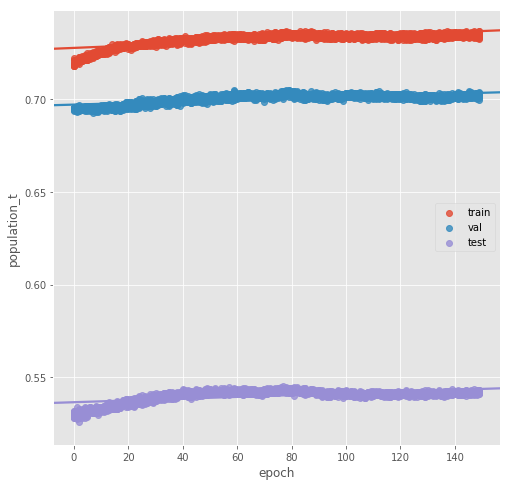

In [63]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

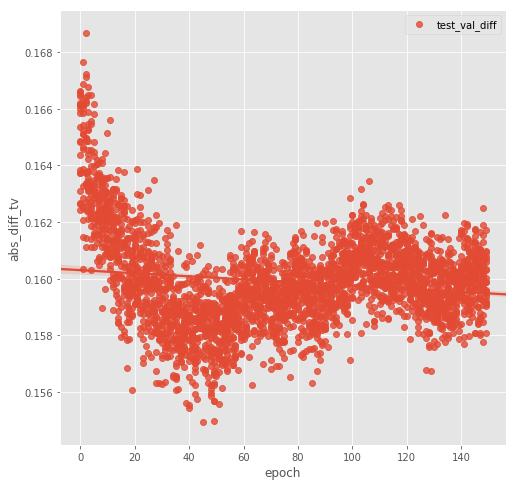

In [64]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

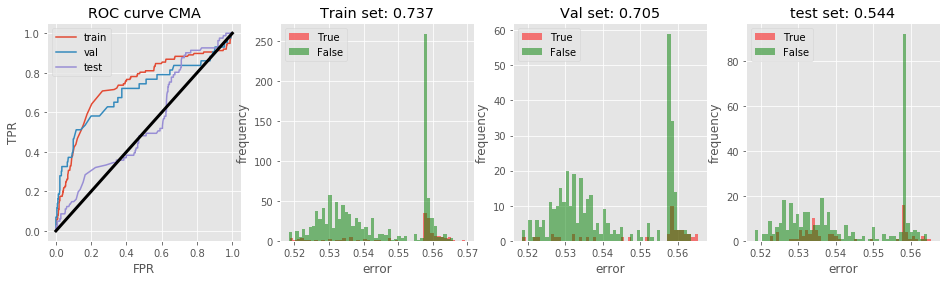

In [65]:
BO_vis.plot_cma(data)

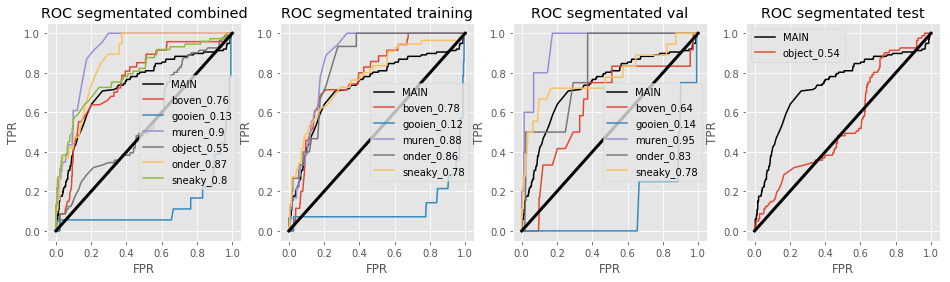

In [66]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

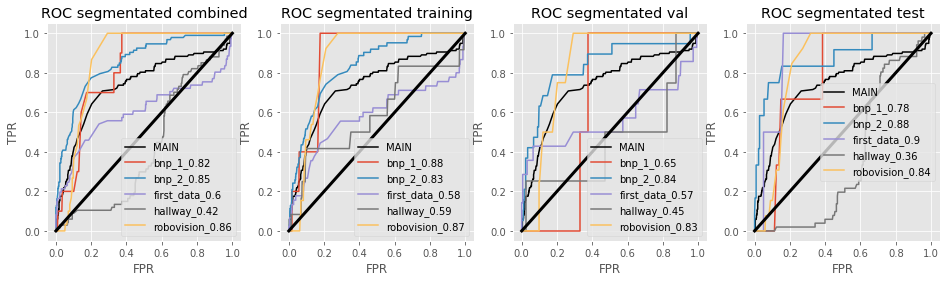

In [67]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky relu c sigmoid

In [76]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu_C_sigmoid'
dict_c['bounds'] = [-100.,100]
path   = path_best.replace('bayes_opt','CMA_ES/leaky_relu_C_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 242 (seed=815882, Mon May  7 17:26:50 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 -7.207568298361932e-01 1.0e+00 4.13e-01  4e-01  4e-01 0:29.3
    2     40 -7.221156275392107e-01 1.0e+00 4.05e-01  4e-01  4e-01 0:35.5
    3     60 -7.230544952988330e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:39.7
    4     80 -7.235119799526128e-01 1.0e+00 3.93e-01  4e-01  4e-01 0:44.0
    5    100 -7.238943551856227e-01 1.0e+00 3.88e-01  4e-01  4e-01 0:49.5
    6    120 -7.244645039705572e-01 1.0e+00 3.84e-01  4e-01  4e-01 0:53.8
    7    140 -7.256321140570696e-01 1.0e+00 3.80e-01  4e-01  4e-01 0:58.4
    8    160 -7.259701064505337e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:02.7
    9    180 -7.261681221961995e-01 1.0e+00 3.73e-01  4e-01  4e-01 1:07.5
   10    200 -7.276703106115956e-01 1.0e+00 3.71e-01  4e-01  4e-01 1:12.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    220 -7.289164

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2020 -7.652216069319168e-01 1.3e+00 4.50e-01  4e-01  5e-01 11:30.6
  102   2040 -7.653581695151346e-01 1.3e+00 4.51e-01  4e-01  5e-01 11:34.5
  103   2060 -7.650201771216705e-01 1.3e+00 4.52e-01  4e-01  5e-01 11:38.6
  104   2080 -7.659180761063276e-01 1.3e+00 4.52e-01  4e-01  5e-01 11:42.5
  105   2100 -7.662458263060504e-01 1.3e+00 4.53e-01  4e-01  5e-01 11:46.2
  106   2120 -7.670515455470356e-01 1.3e+00 4.53e-01  4e-01  5e-01 12:12.3
  107   2140 -7.661707168852806e-01 1.3e+00 4.54e-01  4e-01  5e-01 12:17.0
  108   2160 -7.672905300676669e-01 1.3e+00 4.54e-01  5e-01  5e-01 12:20.6
  109   2180 -7.665223655370664e-01 1.3e+00 4.54e-01  5e-01  5e-01 12:24.3
  110   2200 -7.670447174178747e-01 1.3e+00 4.55e-01  5e-01  5e-01 12:28.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2220 -7.671744518719317e-01 1.3e+00 4.56e-01  5e-01  5e-01 12:32.7
  112   2240 -7.672085925177361

In [77]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

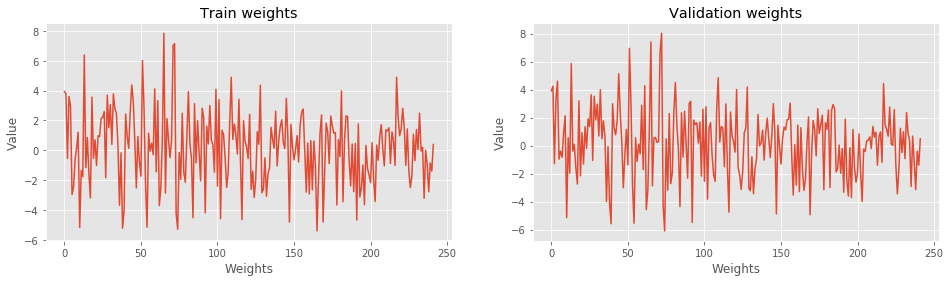

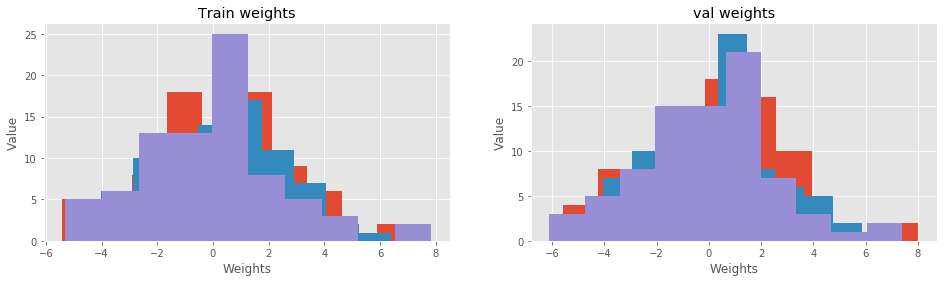

In [78]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

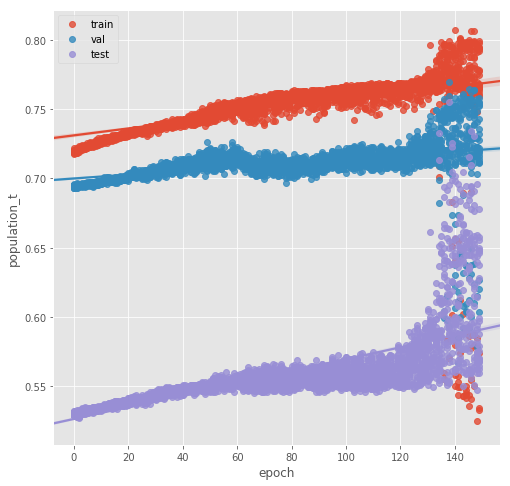

In [79]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

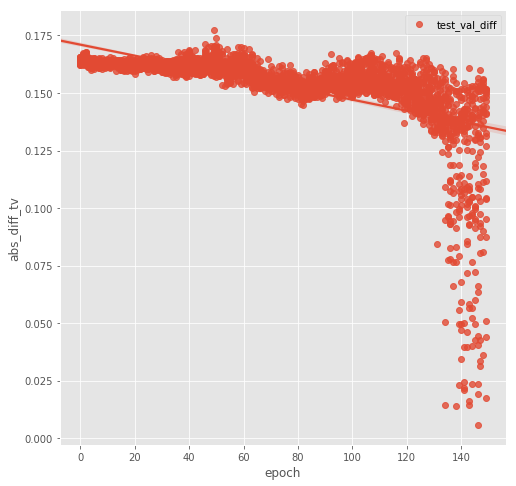

In [80]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

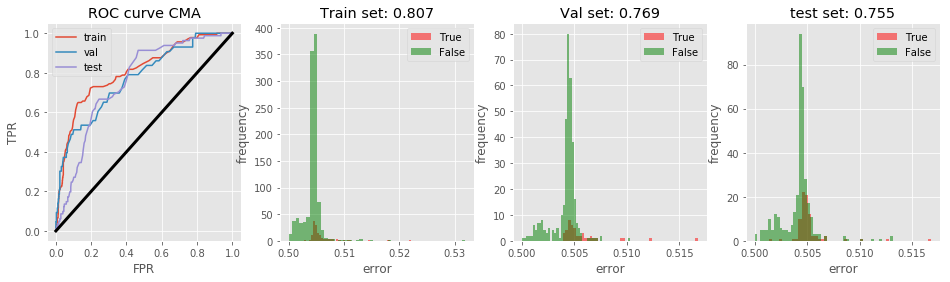

In [81]:
BO_vis.plot_cma(data)

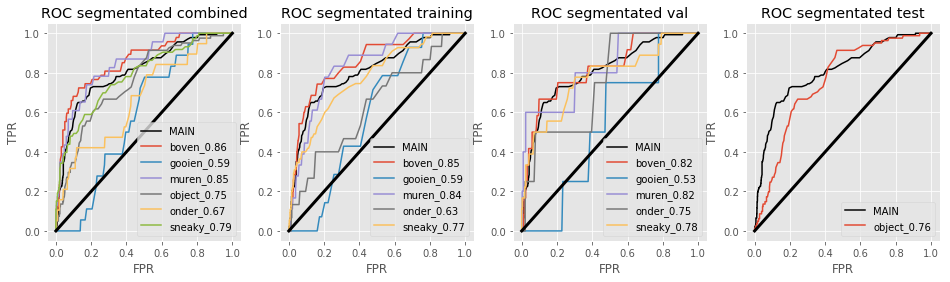

In [82]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

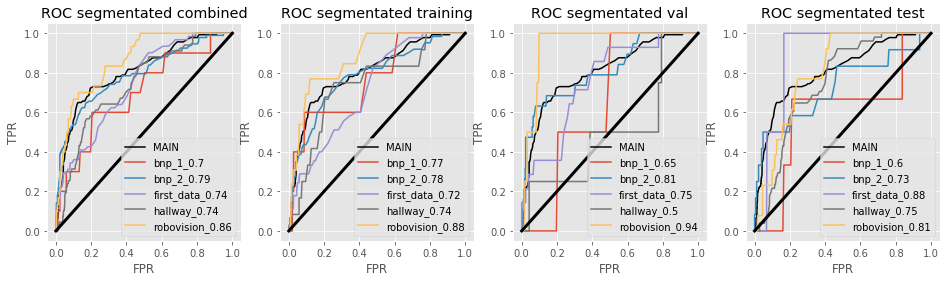

In [83]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)